In [4]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
# read csv as df
df = pd.read_csv("merged.csv")
df = df.drop_duplicates()

In [6]:
# examine df
df.head()

,Chromosome,ExonStart,UTREnd,Strand,Covrage,RefID,RefGeneID,RefUTRStart,RefUTREnd,RefUTRLength,UTRLength,UTRDiff,UTRType,filename
0,chr1,151292133,151293033,-,43.966122,NM_001198773.3,PI4KB,151291803,151292851,1048,718,330,shorter,SRR11463564_filtered.csv
1,chr1,205718179,205718479,-,54.560490,XM_005245453.1,NUCKS1,205713192,205718279,5087,100,4987,shorter,SRR11463564_filtered.csv
2,chr1,202012850,202016050,+,34.236881,XM_005244942.3,ELF3,202012900,202013036,136,3150,3014,longer,SRR11463564_filtered.csv
3,chr1,150308047,150308447,+,107.424507,NM_031901.6,MRPS21,150308228,150308979,751,219,532,shorter,SRR11463564_filtered.csv
4,chr1,150308047,150308447,+,81.565842,NM_018997.3,MRPS21,150308228,150308979,751,219,532,shorter,SRR11463564_filtered.csv


In [7]:
# dictionary to map chromosome names to their corresponding adjustment values
chromosome_map = {
    "chr1": 0,
    "chr2": 500000000,
    "chr3": 100000000,
    "chr4": 150000000,
    "chr5": 2000000000,
    "chr6": 2500000000,
    "chr7": 3000000000,
    "chr8": 3500000000,
    "chr9": 4000000000,
    "chr10": 4500000000,
    "chr11": 5000000000,
    "chr12": 5500000000,
    "chr13": 6000000000,
    "chr14": 6500000000,
    "chr15": 7000000000,
    "chr16": 7500000000,
    "chr17": 8000000000,
    "chr18": 8500000000,
    "chr19": 9000000000,
    "chr20": 9500000000,
    "chr21": 10000000000,
    "chr22": 10500000000,
    "chrX": 11000000000,
    "chrY": 11500000000
    

}

In [8]:
# add new columns with adjusted start and end values based on chromosome name
df["adjusted_start"] = df.apply(lambda x: x["ExonStart"] + chromosome_map[x["Chromosome"]], axis=1)
df["adjusted_end"] = df.apply(lambda x: x["UTREnd"] + chromosome_map[x["Chromosome"]], axis=1)

In [9]:
# Calculate the midpoint of each gene
df['midpoint'] = (df['adjusted_start'] + df['adjusted_end']) / 2

In [13]:
df.head()

,Chromosome,ExonStart,UTREnd,Strand,Covrage,RefID,RefGeneID,RefUTRStart,RefUTREnd,RefUTRLength,UTRLength,UTRDiff,UTRType,filename,adjusted_start,adjusted_end,midpoint
0,chr1,151292133,151293033,-,43.966122,NM_001198773.3,PI4KB,151291803,151292851,1048,718,330,shorter,SRR11463564_filtered.csv,151292133,151293033,151292583.0
1,chr1,205718179,205718479,-,54.560490,XM_005245453.1,NUCKS1,205713192,205718279,5087,100,4987,shorter,SRR11463564_filtered.csv,205718179,205718479,205718329.0
2,chr1,202012850,202016050,+,34.236881,XM_005244942.3,ELF3,202012900,202013036,136,3150,3014,longer,SRR11463564_filtered.csv,202012850,202016050,202014450.0
3,chr1,150308047,150308447,+,107.424507,NM_031901.6,MRPS21,150308228,150308979,751,219,532,shorter,SRR11463564_filtered.csv,150308047,150308447,150308247.0
4,chr1,150308047,150308447,+,81.565842,NM_018997.3,MRPS21,150308228,150308979,751,219,532,shorter,SRR11463564_filtered.csv,150308047,150308447,150308247.0


In [21]:
dfsubset = df.loc[:, ["filename", "UTRDiff"]]
print(dfsubset)


                       filename  UTRDiff
0      SRR11463564_filtered.csv      330
1      SRR11463564_filtered.csv     4987
2      SRR11463564_filtered.csv     3014
3      SRR11463564_filtered.csv      532
4      SRR11463564_filtered.csv      532
...                         ...      ...
36186   SRR5122593_filtered.csv      322
36187   SRR5122593_filtered.csv      699
36188   SRR5122593_filtered.csv      322
36189   SRR5122593_filtered.csv     1072
36190   SRR5122593_filtered.csv     4915

[36191 rows x 2 columns]


TypeError: unhashable type: 'numpy.ndarray'

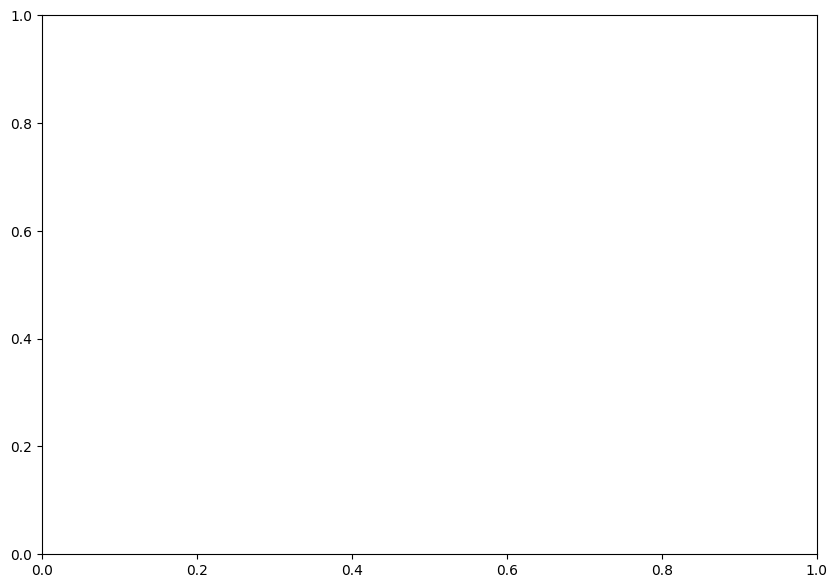

In [22]:
plt.figure(figsize=(10,7))
plt.scatter(dfsubset[["filename"]], dfsubset[["UTRDiff"]], s=5)

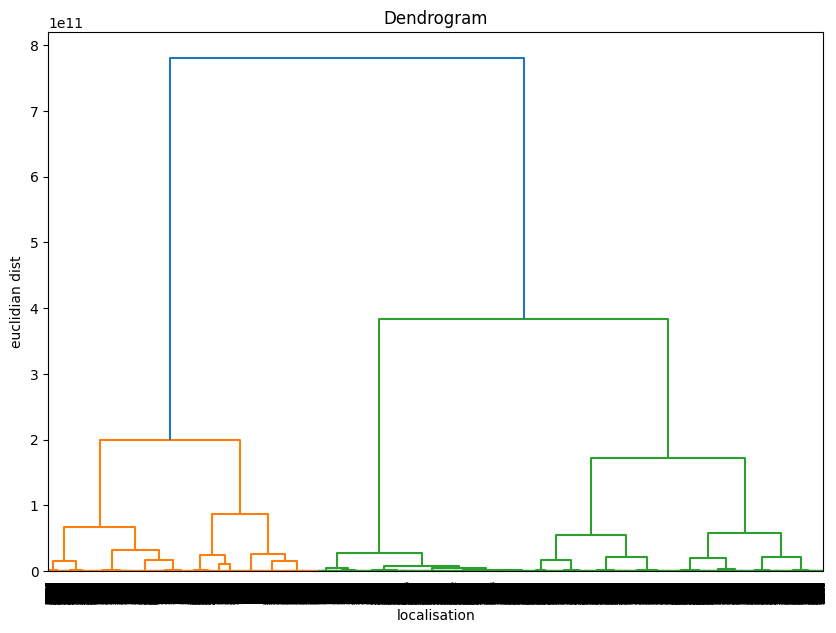

In [21]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,7))

dendrogram = sch.dendrogram(sch.linkage(dfsubset, method="ward"))
plt.title('Dendrogram')
plt.xlabel('localisation')
plt.ylabel('euclidian dist')
plt.show()

In [12]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')
cluster.fit_predict(dfsubset)

C:\Users\natdzi3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, ..., 1, 1, 1], dtype=int64)

In [13]:
cl = cluster.fit_predict(dfsubset)

C:\Users\natdzi3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [14]:
from sklearn.metrics import silhouette_score

In [15]:
silhouette_score(dfsubset,cl)

0.6151658549935983

In [16]:
X = dfsubset.values

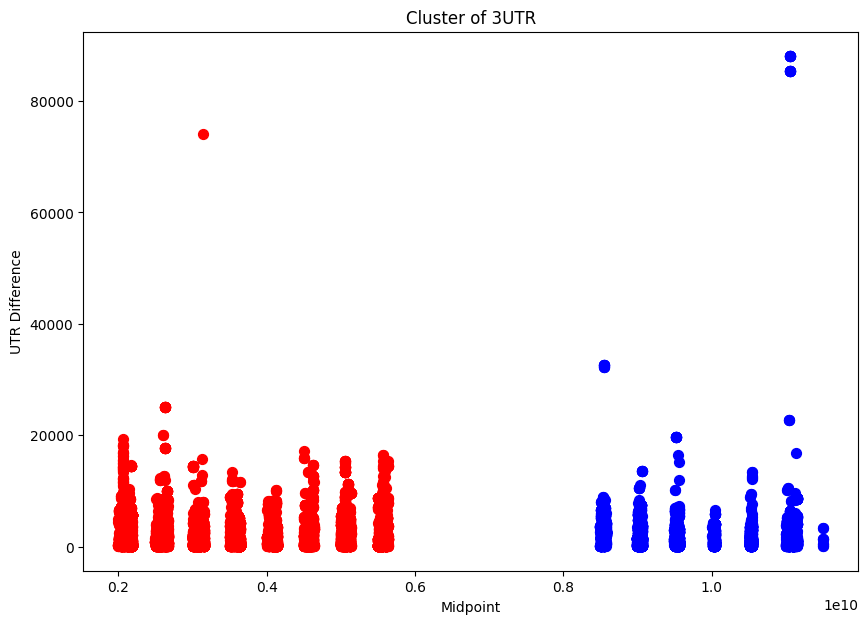

In [18]:
plt.figure(figsize=(10,7))
plt.scatter(X[cl==0,0], X[cl==0,1], s = 50, c='red', label='Cluster 1')
plt.scatter(X[cl==1,0], X[cl==1,1], s = 50, c='blue', label='Cluster 2')
# plt.scatter(X[cl==1,1], X[cl==1,1], s = 50, c='yellow', label='Cluster 3')
# plt.scatter(X[cl==0,1], X[cl==1,0], s = 50, c='green', label='Cluster 4')
plt.title('Cluster of 3UTR')
plt.xlabel('Midpoint')
plt.ylabel('UTR Difference')
plt.show()

In [14]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dfsubset[["UTRLength_T", "midpoint_T"]] = scaler.fit_transform(dfsubset[["UTRLength", "midpoint"]])
dfsubset



,adjusted_start,adjusted_end,RefID,filename,Strand,midpoint,UTRLength,UTRLength_T,midpoint_T
0,151292133,151293033,NM_001198773.3,SRR11463564_filtered.csv,-,1.512926e+08,718,-0.108201,-1.251767
1,205718179,205718479,XM_005245453.1,SRR11463564_filtered.csv,-,2.057183e+08,100,-0.354409,-1.235892
2,202012850,202016050,XM_005244942.3,SRR11463564_filtered.csv,+,2.020144e+08,3150,0.860696,-1.236972
3,150308047,150308447,NM_031901.6,SRR11463564_filtered.csv,+,1.503082e+08,219,-0.307000,-1.252054
4,150308047,150308447,NM_018997.3,SRR11463564_filtered.csv,+,1.503082e+08,219,-0.307000,-1.252054
...,...,...,...,...,...,...,...,...,...
36186,11053533111,11053533411,XM_017029198.2,SRR5122593_filtered.csv,-,1.105353e+10,197,-0.315765,1.928250
36187,11153929923,11153930223,NM_003491.4,SRR5122593_filtered.csv,-,1.115393e+10,63,-0.369150,1.957534
36188,11053533111,11053533411,XM_005261965.4,SRR5122593_filtered.csv,-,1.105353e+10,197,-0.315765,1.928250
36189,11100629686,11100629986,NM_003270.4,SRR5122593_filtered.csv,-,1.110063e+10,1111,0.048368,1.941987


In [15]:
# Create function to work out opt number of clusters

def optimise_k_means(data, max_k):
    means = []
    inertials = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)

        means.append(k)
        inertials.append(kmeans.inertia_)

    # Generate the elbow plot
    fig = plt.subplots(figsize=(10,5))
    plt.plot(means, inertials, "o-")
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show

C:\Users\natdzi3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\natdzi3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\natdzi3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn

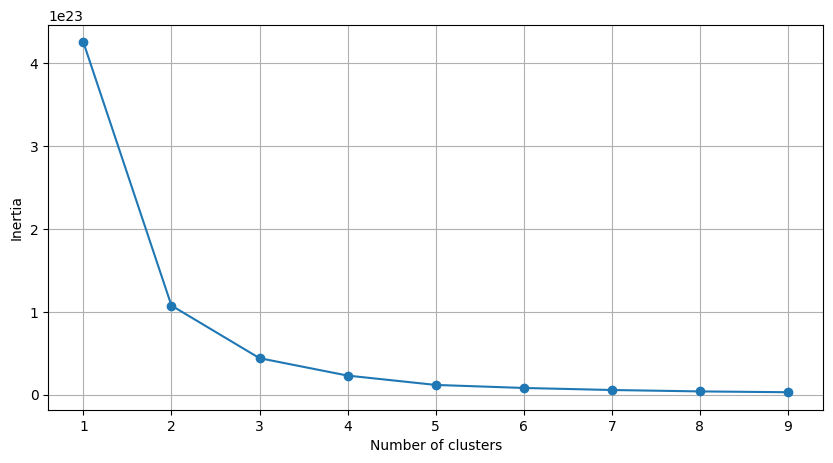

In [17]:
optimise_k_means(dfsubset[['midpoint', 'UTRLength']], 10)

In [18]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dfsubset[["midpoint", "UTRLength"]])
dfsubset['kmeans_4'] = kmeans.labels_
dfsubset

C:\Users\natdzi3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,adjusted_start,adjusted_end,RefID,filename,Strand,midpoint,UTRLength,UTRLength_T,midpoint_T,kmeans_4
0,151292133,151293033,NM_001198773.3,SRR11463564_filtered.csv,-,1.512926e+08,718,-0.108201,-1.251767,3
1,205718179,205718479,XM_005245453.1,SRR11463564_filtered.csv,-,2.057183e+08,100,-0.354409,-1.235892,3
2,202012850,202016050,XM_005244942.3,SRR11463564_filtered.csv,+,2.020144e+08,3150,0.860696,-1.236972,3
3,150308047,150308447,NM_031901.6,SRR11463564_filtered.csv,+,1.503082e+08,219,-0.307000,-1.252054,3
4,150308047,150308447,NM_018997.3,SRR11463564_filtered.csv,+,1.503082e+08,219,-0.307000,-1.252054,3
...,...,...,...,...,...,...,...,...,...,...
36186,11053533111,11053533411,XM_017029198.2,SRR5122593_filtered.csv,-,1.105353e+10,197,-0.315765,1.928250,2
36187,11153929923,11153930223,NM_003491.4,SRR5122593_filtered.csv,-,1.115393e+10,63,-0.369150,1.957534,2
36188,11053533111,11053533411,XM_005261965.4,SRR5122593_filtered.csv,-,1.105353e+10,197,-0.315765,1.928250,2
36189,11100629686,11100629986,NM_003270.4,SRR5122593_filtered.csv,-,1.110063e+10,1111,0.048368,1.941987,2


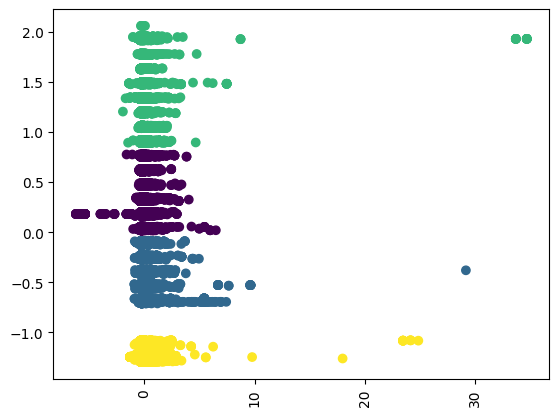

In [19]:
plt.scatter(x=dfsubset['UTRLength_T'], y=dfsubset['midpoint_T'], c=dfsubset['kmeans_4'])
plt.xlim=(-0.1,1)
plt.ylim=(3, 1.5)
plt.xticks(rotation=90)
plt.show()

In [20]:
dfsubset

,adjusted_start,adjusted_end,RefID,filename,Strand,midpoint,UTRLength,UTRLength_T,midpoint_T,kmeans_4
0,151292133,151293033,NM_001198773.3,SRR11463564_filtered.csv,-,1.512926e+08,718,-0.108201,-1.251767,3
1,205718179,205718479,XM_005245453.1,SRR11463564_filtered.csv,-,2.057183e+08,100,-0.354409,-1.235892,3
2,202012850,202016050,XM_005244942.3,SRR11463564_filtered.csv,+,2.020144e+08,3150,0.860696,-1.236972,3
3,150308047,150308447,NM_031901.6,SRR11463564_filtered.csv,+,1.503082e+08,219,-0.307000,-1.252054,3
4,150308047,150308447,NM_018997.3,SRR11463564_filtered.csv,+,1.503082e+08,219,-0.307000,-1.252054,3
...,...,...,...,...,...,...,...,...,...,...
36186,11053533111,11053533411,XM_017029198.2,SRR5122593_filtered.csv,-,1.105353e+10,197,-0.315765,1.928250,2
36187,11153929923,11153930223,NM_003491.4,SRR5122593_filtered.csv,-,1.115393e+10,63,-0.369150,1.957534,2
36188,11053533111,11053533411,XM_005261965.4,SRR5122593_filtered.csv,-,1.105353e+10,197,-0.315765,1.928250,2
36189,11100629686,11100629986,NM_003270.4,SRR5122593_filtered.csv,-,1.110063e+10,1111,0.048368,1.941987,2


In [32]:

df2 = dfsubset[['RefID', 'filename', 'midpoint', 'UTRLength']]
df2
location_df = df2.groupby(['midpoint', 'UTRLength']).size().reset_index(name='count')

# Pivot the data to create a matrix of locations and counts
pivoted_df = location_df.pivot(index='UTRLength', columns='midpoint', values='count').fillna(0)
pivoted_df

midpoint,1.255187e+06,1.387032e+06,1.387132e+06,1.439930e+06,1.439980e+06,1.495884e+06,1.541867e+06,1.542017e+06,1.635706e+06,1.702849e+06,...,1.115528e+10,1.115538e+10,1.115546e+10,1.115546e+10,1.150030e+10,1.150030e+10,1.150160e+10,1.150160e+10,1.150222e+10,1.150222e+10
UTRLength,,,,,,,,,,,,,,,,,,,,,
-14631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-14231,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-13531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-12531,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
-9031,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


  Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)


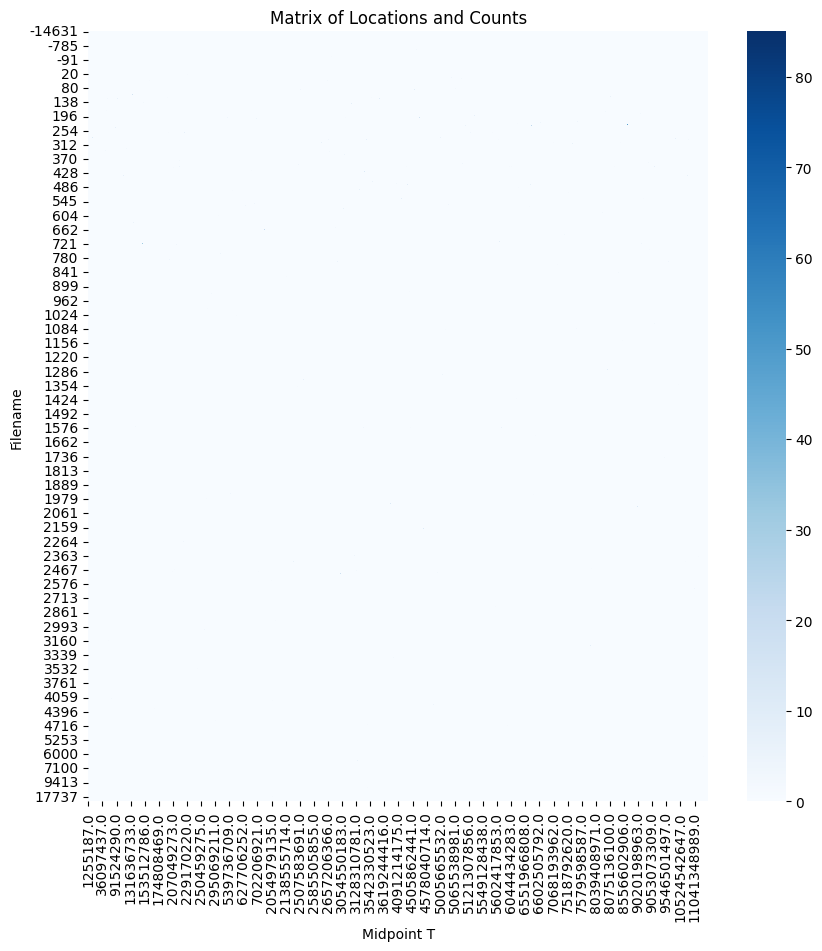

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(pivoted_df, cmap='Blues')
plt.title('Matrix of Locations and Counts')
plt.xlabel('Midpoint T')
plt.ylabel('Filename')
plt.show()



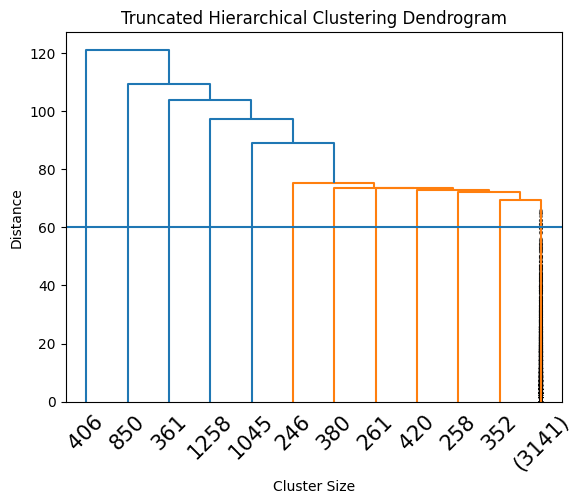

In [36]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(pivoted_df, method='ward')
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=15., show_contracted=True)
plt.title('Truncated Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.axhline(y=60)
plt.axhline(y=150)
plt.show()


In [24]:
k = 3
Hclustering = AgglomeariveClustering

NameError: name 'AgglomeariveClustering' is not defined

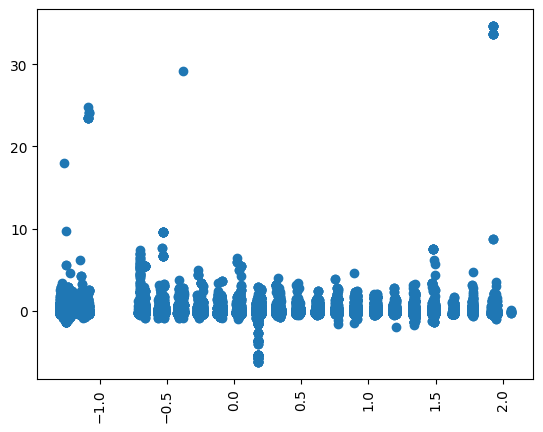

In [29]:
dfsubset
plt.scatter(x=dfsubset['midpoint_T'], y=dfsubset['UTRLength_T'])
plt.xlim=(-1,10)
plt.ylim=(3, 1.5)
plt.xticks(rotation=90)
plt.show()

In [37]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform

In [39]:
# Convert the data to a numpy array
data = np.column_stack((dfsubset[['midpoint']], dfsubset[['UTRLength']]))

# Calculate pairwise distances
distances = pdist(data)  # Pairwise distances between data points
distance_matrix = squareform(distances)  # Convert to a square distance matrix

# Perform hierarchical clustering
n_clusters = 3  # Number of clusters
clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='precomputed', linkage='complete')
cluster_labels = clustering.fit_predict(distance_matrix)

# Compare cluster labels with molecular subtype labels
for cluster in range(n_clusters):
    samples_in_cluster = np.where(cluster_labels == cluster)[0]
    #subtypes_in_cluster = set(molecular_subtypes[samples_in_cluster])
    print(f"Cluster {cluster}: Samples in cluster: {samples_in_cluster}")

C:\Users\natdzi3\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


Cluster 0: Samples in cluster: [    0     1     2 ... 36170 36171 36172]
Cluster 1: Samples in cluster: [  785   786   787 ... 36188 36189 36190]
Cluster 2: Samples in cluster: [  319   320   321 ... 35578 35579 35580]


In [23]:
from sklearn.decomposition import PCA
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt



In [27]:
def readAndProcessData():
    """
        Function to read the raw text file into a dataframe and keeping the 
        population, gender separate from the genetic data
        
        We also calculate the population mode for each attribute or trait (columns)
        Note that mode is just the most frequently occuring trait
        
        return: dataframe (df), modal traits (modes), population and gender for each individual row
    """
    
    df = pd.read_csv('merged.csv', header=None)
    sample = df['filename']
    length = df['UTRDiff']
    print(np.unique(sample))
    
    df.drop(df.columns[[0, 1, 2]],axis=1,inplace=True)
    modes = np.array(df.mode().values[0,:])
    return df, modes, sample, length


In [28]:
df, modes, sample, length = readAndProcessData()



KeyError: 'filename'